In [ ]:
!pip install dataretrieval

In [ ]:
import pandas as pd

# first import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# specify the USGS site code for which we want data.
site = '11447650'

# get basic info about the site
site_info = nwis.get_record(sites=site, service='site')

site_info.head()

# get daily values (dv)
df = nwis.get_record(sites=site, service='dv', start='1948-10-01', end='2025-08-02')

# display first few rows
df.head()

,site_no,00010_right bank pump stand_Maximum,00010_right bank pump stand_Maximum_cd,00010_right bank pump stand_Minimum,00010_right bank pump stand_Minimum_cd,00010_right bank pump stand_Mean,00010_right bank pump stand_Mean_cd,00060_Mean,00060_Mean_cd,72137_Mean,72137_Mean_cd,80154_Mean,80154_Mean_cd,80155_Mean,80155_Mean_cd
datetime,,,,,,,,,,,,,,,
1948-10-01 00:00:00+00:00,11447650,NaN,NaN,NaN,NaN,NaN,NaN,10400.0,A,NaN,NaN,NaN,NaN,NaN,NaN
1948-10-02 00:00:00+00:00,11447650,NaN,NaN,NaN,NaN,NaN,NaN,10300.0,A,NaN,NaN,NaN,NaN,NaN,NaN
1948-10-03 00:00:00+00:00,11447650,NaN,NaN,NaN,NaN,NaN,NaN,10300.0,A,NaN,NaN,NaN,NaN,NaN,NaN
1948-10-04 00:00:00+00:00,11447650,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,A,NaN,NaN,NaN,NaN,NaN,NaN
1948-10-05 00:00:00+00:00,11447650,NaN,NaN,NaN,NaN,NaN,NaN,9900.0,A,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check for bad data quality flags
  # variables ending in "_cd" contain data quality information
    # e	- The value has been edited or estimated by USGS personnel.
    # <	- The Value is known to be less than reported value.
    # >	- The value is known to be greater than reported value.
    # R	- Records for these data have been revised.
    # A	- Approved for publication -- Processing and review completed.
    # P	- Provisional data subject to revision.

# datetime column is used for indexing
# remove indexing so that we can access the column and column name
df.reset_index(inplace=True)

# create a subset of relevant data and data quality flag columns
df1 = df[['datetime', '00060_Mean', '00060_Mean_cd', '72137_Mean', '72137_Mean_cd', '80154_Mean', '80154_Mean_cd', '80155_Mean', '80155_Mean_cd']]

# Get all column names that end with '_cd'
cd_columns = [col for col in df1.columns if col.endswith('_cd')]

# Iterate through the identified columns and print unique values
for col in cd_columns:
  print(f"Unique values for '{col}':")
  display(df[col].unique())

Unique values for '00060_Mean_cd':


array(['A', 'A, e', 'A, R', nan], dtype=object)

Unique values for '72137_Mean_cd':


array([nan, 'A', 'A, e', 'P'], dtype=object)

Unique values for '80154_Mean_cd':


array([nan, 'A', 'A, e', 'P'], dtype=object)

Unique values for '80155_Mean_cd':


array([nan, 'A', 'A, e', 'P'], dtype=object)

In [ ]:
# Get all column names that end with '_cd'
cd_columns = [col for col in df1.columns if col.endswith('_cd')]

# Iterate through the identified columns and calculate the percentage of 'P' values
for col in cd_columns:
  total_count = df1[col].count() # Count non-NaN values
  p_count = (df1[col] == 'P').sum() # Count 'P' values
  percentage = (p_count / total_count) * 100 if total_count > 0 else 0
  print(f"Percentage of 'P' in '{col}': {percentage:.2f}%")

Percentage of 'P' in '00060_Mean_cd': 0.00%
Percentage of 'P' in '72137_Mean_cd': 6.59%
Percentage of 'P' in '80154_Mean_cd': 0.01%
Percentage of 'P' in '80155_Mean_cd': 0.01%


In [ ]:
# remove all rows with Provisional data (where data flag columns == "P")

# Get all column names that end with '_cd'
cd_columns = [col for col in df1.columns if col.endswith('_cd')]

# Create a boolean mask for rows to keep (where none of the cd columns have 'P')
mask = ~df1[cd_columns].isin(['P']).any(axis=1)

# Filter the DataFrame using the mask
df1_filtered = df1[mask].copy()

# Display the first few rows of the filtered DataFrame
display(df1_filtered.head())

,datetime,00060_Mean,00060_Mean_cd,72137_Mean,72137_Mean_cd,80154_Mean,80154_Mean_cd,80155_Mean,80155_Mean_cd
0,1948-10-01 00:00:00+00:00,10400.0,A,NaN,NaN,NaN,NaN,NaN,NaN
1,1948-10-02 00:00:00+00:00,10300.0,A,NaN,NaN,NaN,NaN,NaN,NaN
2,1948-10-03 00:00:00+00:00,10300.0,A,NaN,NaN,NaN,NaN,NaN,NaN
3,1948-10-04 00:00:00+00:00,10200.0,A,NaN,NaN,NaN,NaN,NaN,NaN
4,1948-10-05 00:00:00+00:00,9900.0,A,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Information about the codes can be found in
# https://help.waterdata.usgs.gov/parameter_cd?group_cd=PHY

# create subset with variables of interest
  # 00060_Mean - Discharge, cubic feet per second, mean daily
  # 72137_Mean - Discharge, tidally filtered, cubic feet per second, mean daily
  # 80154_Mean - Suspended sediment concentration, milligrams per liter, mean daily
  # 80155_Mean - Suspended sediment discharge, short tons per day

# NOTE: "tidally filtered" discharge is the result of removing the influence of
# tides from raw discharge data. See info on methodology here: https://www.usgs.gov/publications/methods-accurate-estimation-net-discharge-a-tidal-channel
# Site webpage says discharge is available from 1948-10-01 to 2015-09-30, while
# tidally filtered discharge is available from 2015-09-30 to 2025-08-02

# datetime column is used for indexing
# remove indexing so that we can access the column and column name
df1_filtered.reset_index(inplace=True)

# select relevant columns
df_s = df1_filtered[['datetime', '00060_Mean', '72137_Mean', '80154_Mean','80155_Mean']]

# rename columns according to definitions in USGS documentation
df_s = df_s.rename(columns={'datetime': 'DATE', '00060_Mean': 'discharge', '72137_Mean': 'disc_tf', '80154_Mean': 'SSC', '80155_Mean': 'SSD'})

df_s

,DATE,discharge,disc_tf,SSC,SSD
0,1948-10-01 00:00:00+00:00,10400.0,NaN,NaN,NaN
1,1948-10-02 00:00:00+00:00,10300.0,NaN,NaN,NaN
2,1948-10-03 00:00:00+00:00,10300.0,NaN,NaN,NaN
3,1948-10-04 00:00:00+00:00,10200.0,NaN,NaN,NaN
4,1948-10-05 00:00:00+00:00,9900.0,NaN,NaN,NaN
...,...,...,...,...,...
27821,2024-12-04 00:00:00+00:00,NaN,22600.0,NaN,NaN
27822,2024-12-05 00:00:00+00:00,NaN,20000.0,NaN,NaN
27823,2024-12-06 00:00:00+00:00,NaN,18000.0,NaN,NaN
27824,2024-12-07 00:00:00+00:00,NaN,16400.0,NaN,NaN


In [ ]:
# create 1 discharge column that concatenates tidally filtered and unfiltered discharge data
# Use combine_first to prioritize 'disc_tf' where it exists, otherwise use 'discharge'
df_s['discharge_combined'] = df_s['disc_tf'].combine_first(df_s['discharge'])

# Display the relevant columns to show the result
display(df_s[['DATE', 'discharge', 'disc_tf', 'discharge_combined']].head())
display(df_s[['DATE', 'discharge', 'disc_tf', 'discharge_combined']].tail())

,DATE,discharge,disc_tf,discharge_combined
0,1948-10-01 00:00:00+00:00,10400.0,NaN,10400.0
1,1948-10-02 00:00:00+00:00,10300.0,NaN,10300.0
2,1948-10-03 00:00:00+00:00,10300.0,NaN,10300.0
3,1948-10-04 00:00:00+00:00,10200.0,NaN,10200.0
4,1948-10-05 00:00:00+00:00,9900.0,NaN,9900.0


,DATE,discharge,disc_tf,discharge_combined
27821,2024-12-04 00:00:00+00:00,NaN,22600.0,22600.0
27822,2024-12-05 00:00:00+00:00,NaN,20000.0,20000.0
27823,2024-12-06 00:00:00+00:00,NaN,18000.0,18000.0
27824,2024-12-07 00:00:00+00:00,NaN,16400.0,16400.0
27825,2024-12-08 00:00:00+00:00,NaN,15300.0,15300.0


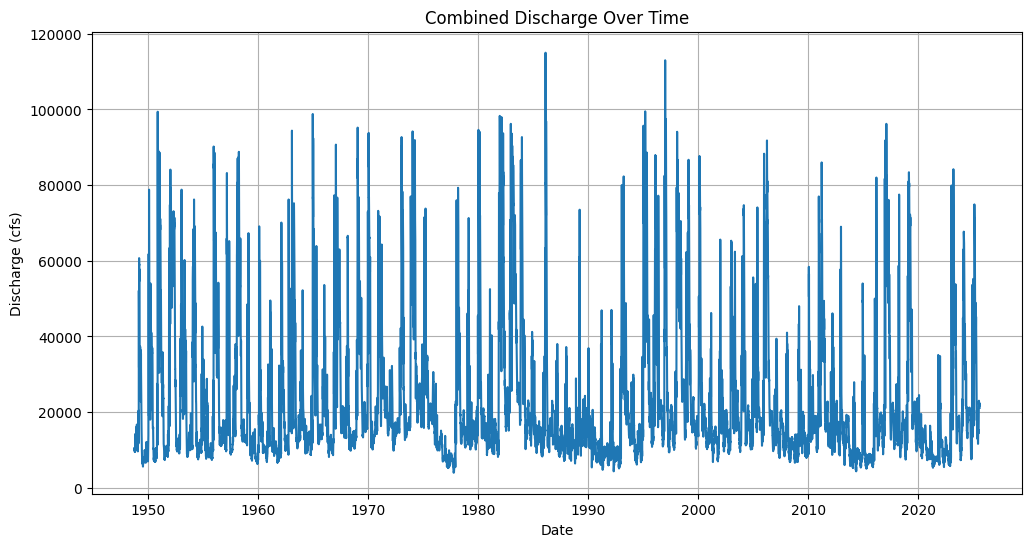

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the DATE column is in datetime format
df_s['DATE'] = pd.to_datetime(df_s['DATE'])

# Set the DATE column as the index for time series plotting
df_s.set_index('DATE', inplace=True)

# Create the time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_s, y='discharge_combined', x=df_s.index)
plt.title('Combined Discharge Over Time')
plt.xlabel('Date')
plt.ylabel('Discharge (cfs)')
plt.grid(True)
plt.show()

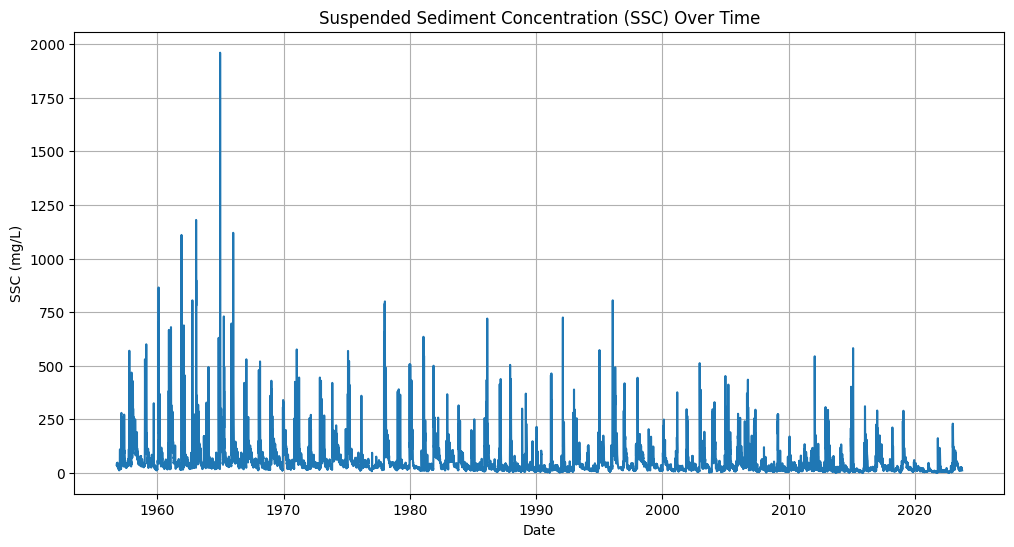

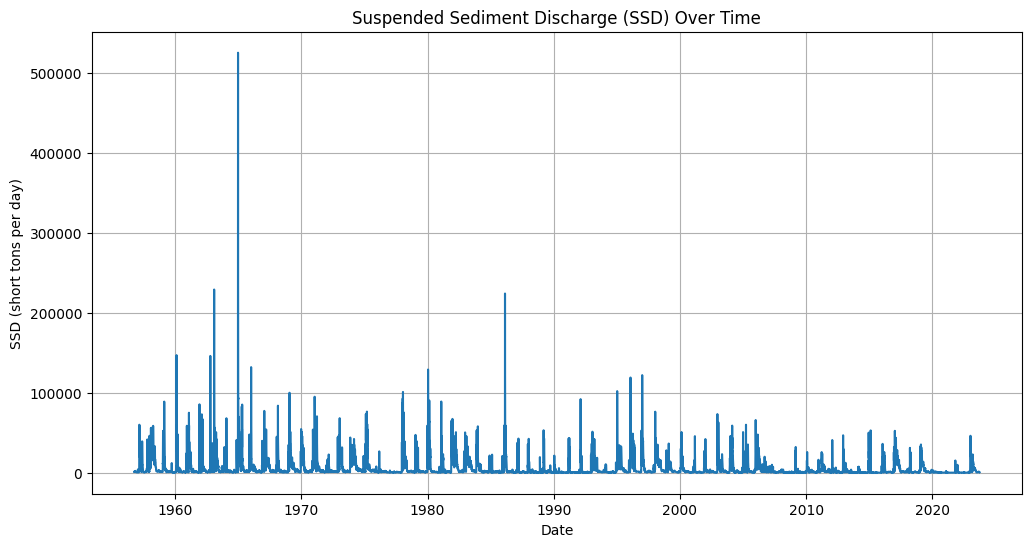

In [ ]:
# Create the time series plot for SSC
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_s, y='SSC', x=df_s.index)
plt.title('Suspended Sediment Concentration (SSC) Over Time')
plt.xlabel('Date')
plt.ylabel('SSC (mg/L)')
plt.grid(True)
plt.show()

# Create the time series plot for SSD
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_s, y='SSD', x=df_s.index)
plt.title('Suspended Sediment Discharge (SSD) Over Time')
plt.xlabel('Date')
plt.ylabel('SSD (short tons per day)')
plt.grid(True)
plt.show()


In [ ]:
df_s.to_csv(f"{site}_raw_daily_data_api_noProvisionalData.csv")